Les traitements qui te permettent de calculer et visualiser les KPI de manière pertinente. / Tests et calculs de KPI


In [3]:
# ===============================
# KPI 1 : Panier moyen (Average Spend)
# Objectif : Montant moyen dépensé par client
# ===============================

import pandas as pd

# Lecture du dataset nettoyé
df = pd.read_csv("../data/processed/marketing_campaign_cleaned.csv")

# Vérifier les colonnes pour confirmer les noms
print("Colonnes disponibles :", df.columns.tolist())

# Sélection automatique des colonnes représentant des montants
amount_cols = [col for col in df.columns if col.startswith('Mnt')]
print("Colonnes utilisées pour le calcul du total dépensé :", amount_cols)

# Création d'une colonne Total_Spent = somme des montants par client
df['Total_Spent'] = df[amount_cols].sum(axis=1)

# Calcul du panier moyen global
avg_spend = df['Total_Spent'].mean()
print(f"Panier moyen global : {avg_spend:.2f}")

# Calcul du panier moyen par statut marital (exemple de segmentation)
avg_by_marital = df.groupby('Marital_Status')['Total_Spent'].mean().sort_values(ascending=False)
print("\nPanier moyen par statut marital :")
print(avg_by_marital)


"""
RESULTATS
Panier moyen global : 613.80

Panier moyen par statut marital :
Marital_Status
Widow       735.722222
Together    616.199234
Single      609.494357
Divorced    606.167464
Married     605.872286
Other       581.200000

"""

Colonnes disponibles : ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Colonnes utilisées pour le calcul du total dépensé : ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Panier moyen global : 613.80

Panier moyen par statut marital :
Marital_Status
Widow       735.722222
Together    616.199234
Single      609.494357
Divorced    606.167464
Married     605.872286
Other       581.200000
Name: Total_Spent, dtype: float64


In [6]:
# ============================================================
# 2eme KPI Taux d’achat après avis positif (Conversion Rate)
# But : Mesurer l’influence des avis sur les décisions d’achat.
# ============================================================

import pandas as pd
from textblob import TextBlob

# Charger le dataset nettoyé
df_reviews = pd.read_csv("../data/processed/customer_reviews_cleaned.csv")

# --- Analyse du sentiment ---
df_reviews['Polarity'] = df_reviews['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_reviews['Positive_Review'] = df_reviews['Polarity'].apply(lambda x: 1 if x > 0 else 0)

# --- Conversion de 'Purchased' en numérique ---
# On considère "Yes" = 1, "No" = 0
df_reviews['Purchased_Num'] = df_reviews['Purchased'].map({'Yes': 1, 'No': 0})

# Si certaines lignes sont incorrectes ou concaténées, on les ignore
df_reviews = df_reviews[df_reviews['Purchased_Num'].notna()]

# --- Calcul du KPI ---
positive_reviews = df_reviews[df_reviews['Positive_Review'] == 1]
conversion_rate = positive_reviews['Purchased_Num'].mean() * 100  # en %

print(f"Taux d'achat après avis positif : {conversion_rate:.2f}%")


"""
RESULTATS
Taux d'achat après avis positif : 45.45%
"""

Taux d'achat après avis positif : 45.45%


In [8]:
# ============================================================
# 3eme KPI Récence moyenne (Recency)
# But : Mesurer la fidélité (combien de jours depuis le dernier achat).
# une colonne Dt_Customer → date de la première inscription / du client
# une colonne Recency → nombre de jours depuis le dernier achat (déjà dans le dataset)
# Plus la récence est faible → clients récents → fidélité élevée.
# ============================================================

import pandas as pd

# Charger le dataset nettoyé
df_personality = pd.read_csv("../data/processed/marketing_campaign_cleaned.csv")

# Vérification rapide
print(df_personality[['ID', 'Recency']].head())

# --- Calcul du KPI ---
recency_mean = df_personality['Recency'].mean()

print(f"Récence moyenne (en jours) : {recency_mean:.2f}")

recency_by_status = df_personality.groupby('Marital_Status')['Recency'].mean()
print(recency_by_status)


"""
RESULTATS
ID  Recency
0  5524       58
1  2174       38
2  4141       26
3  6182       26
4  5324       94
Récence moyenne (en jours) : 50.84
Marital_Status
Divorced    49.952153
Married     50.131545
Other       33.000000
Single      51.395034
Together    51.609195
Widow       54.736111
"""

     ID  Recency
0  5524       58
1  2174       38
2  4141       26
3  6182       26
4  5324       94
Récence moyenne (en jours) : 50.84
Marital_Status
Divorced    49.952153
Married     50.131545
Other       33.000000
Single      51.395034
Together    51.609195
Widow       54.736111
Name: Recency, dtype: float64


In [10]:
# ============================================================
# 4eme KPI Nombre moyen d’achats par client
# But : Mesurer l’activité d’achat.
# Le nombre total d’achats d’un client = somme des colonnes : NumDealsPurchases → achats pendant les promotions, NumWebPurchases, NumCatalogPurchases, NumStorePurchases
# ============================================================

import pandas as pd

# Charger le dataset nettoyé
df_personality = pd.read_csv("../data/processed/marketing_campaign_cleaned.csv")

# Colonnes correspondant aux différents types d'achats
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Calcul du nombre total d’achats par client
df_personality['Total_Purchases'] = df_personality[purchase_cols].sum(axis=1)

# Calcul du KPI : nombre moyen d'achats par client
avg_purchases_per_client = df_personality['Total_Purchases'].mean()

print(f"Nombre moyen d’achats par client : {avg_purchases_per_client:.2f}")

# Optionnel : voir par statut marital, pour affiner l’analyse
avg_purchases_by_status = df_personality.groupby('Marital_Status')['Total_Purchases'].mean()
print("\nNombre moyen d’achats par statut marital :")
print(avg_purchases_by_status)


"""
RESULTATS :
Nombre moyen d’achats par client : 14.98

Nombre moyen d’achats par statut marital :
Marital_Status
Divorced    15.210526
Married     15.157088
Other       13.100000
Single      14.399549
Together    14.904215
Widow       16.708333

"""


Nombre moyen d’achats par client : 14.98

Nombre moyen d’achats par statut marital :
Marital_Status
Divorced    15.210526
Married     15.157088
Other       13.100000
Single      14.399549
Together    14.904215
Widow       16.708333
Name: Total_Purchases, dtype: float64


⭐ Score moyen de satisfaction client : 0.053


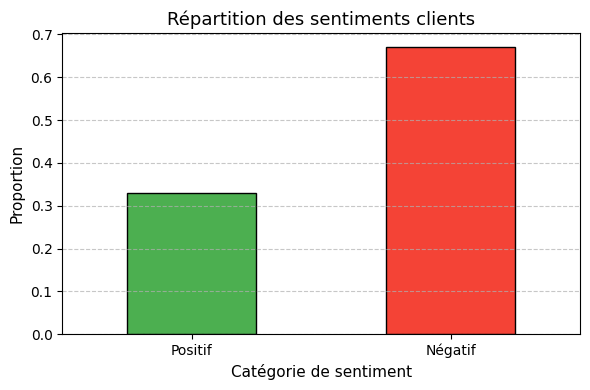

'\nRESULTATS\nScore moyen de satisfaction client : 0.053\n'

In [14]:
# ============================================================
# 5eme KPI Score moyen de satisfaction client
# But : Moyenne des sentiments exprimés dans les avis (dataset 1).
# mesurer le sentiment moyen exprimé par les clients dans leurs avis, afin de quantifier leur niveau global de satisfaction.
# ============================================================


from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset nettoyé
df_reviews = pd.read_csv("../data/processed/customer_reviews_cleaned.csv")

# Vérifier la présence de la colonne Review
if 'Review' not in df_reviews.columns:
    raise ValueError("⚠️ La colonne 'Review' est manquante dans le dataset.")

# --- Analyse de sentiment ---
df_reviews['Sentiment_Score'] = df_reviews['Review'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Score moyen global
avg_sentiment = df_reviews['Sentiment_Score'].mean()
print(f" Score moyen de satisfaction client : {avg_sentiment:.3f}")

# --- Catégorisation des sentiments ---
df_reviews['Satisfaction_Level'] = df_reviews['Sentiment_Score'].apply(
    lambda s: 'Positif' if s > 0.1 else ('Négatif' if s < -0.1 else 'Neutre')
)

# --- Visualisation colorée ---
plt.figure(figsize=(6,4))

# Couleurs par catégorie
colors = {
    'Positif': '#4CAF50',  # vert
    'Négatif': '#F44336'   # rouge
}

df_reviews['Satisfaction_Level'].value_counts(normalize=True).loc[['Positif', 'Négatif']].plot(
    kind='bar',
    color=[colors.get(x, '#999999') for x in ['Positif', 'Négatif']],
    edgecolor='black'
)

plt.title("Répartition des sentiments clients", fontsize=13)
plt.ylabel("Proportion", fontsize=11)
plt.xlabel("Catégorie de sentiment", fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


"""
RESULTATS
Score moyen de satisfaction client : 0.053
"""
